##### [과제] HousingData.csv

In [2]:
# [ 진행 과정 ]
# 1. 전처리
# 2. 데이터셋 준비 - 학습, 검증, 평가
# 3. 학습 진행 : LogisticRegression
# 4. SGDClassifier
# 5. 성능 평가
# 교차검증 : Cross_val_score, predict, 

In [3]:
# 1. Prepare Data
import pandas as pd
houseDF = pd.read_csv('../../DATA/HousingData.csv')

In [4]:
# 1) 결측치 확인
houseDF.info()  # 총 row 506, 일부 row 486 / MEDV 는 506

# 아예 제거한다면
houseDF_2 = houseDF.dropna()
houseDF_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non

In [5]:
# 2) 중복값 확인
houseDF.duplicated().sum()  # 0

0

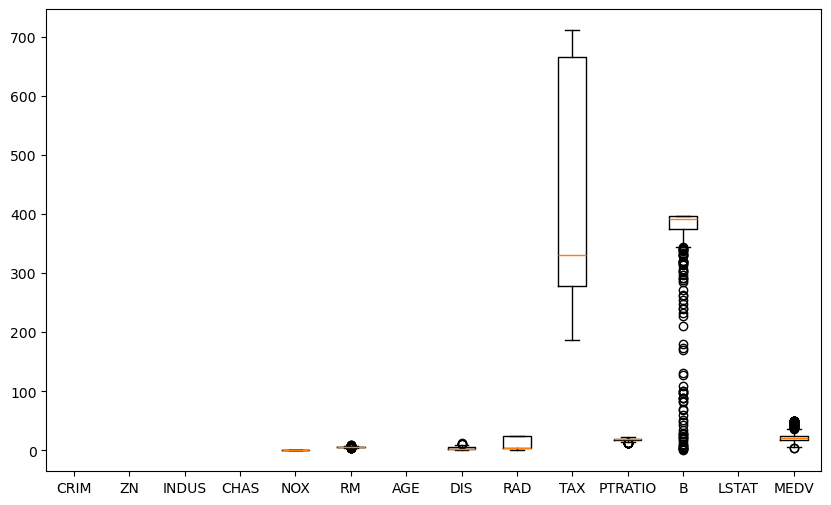

In [6]:
# 3) 이상치 확인: 정규화 후 진행
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# TAX: MinMaxScaler로 정규화
# scaler = MinMaxScaler()
# houseDF['TAX'] = scaler.fit_transform(houseDF['TAX'].values.reshape(-1, 1))
# 너무 나머지와 비교하기 어려운데? 정규화 보류

# boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(houseDF)
plt.xticks(range(1, 15), houseDF.columns)
plt.show()

In [7]:
houseDF['ZN'].corr(houseDF['MEDV'])

0.3731361297553634

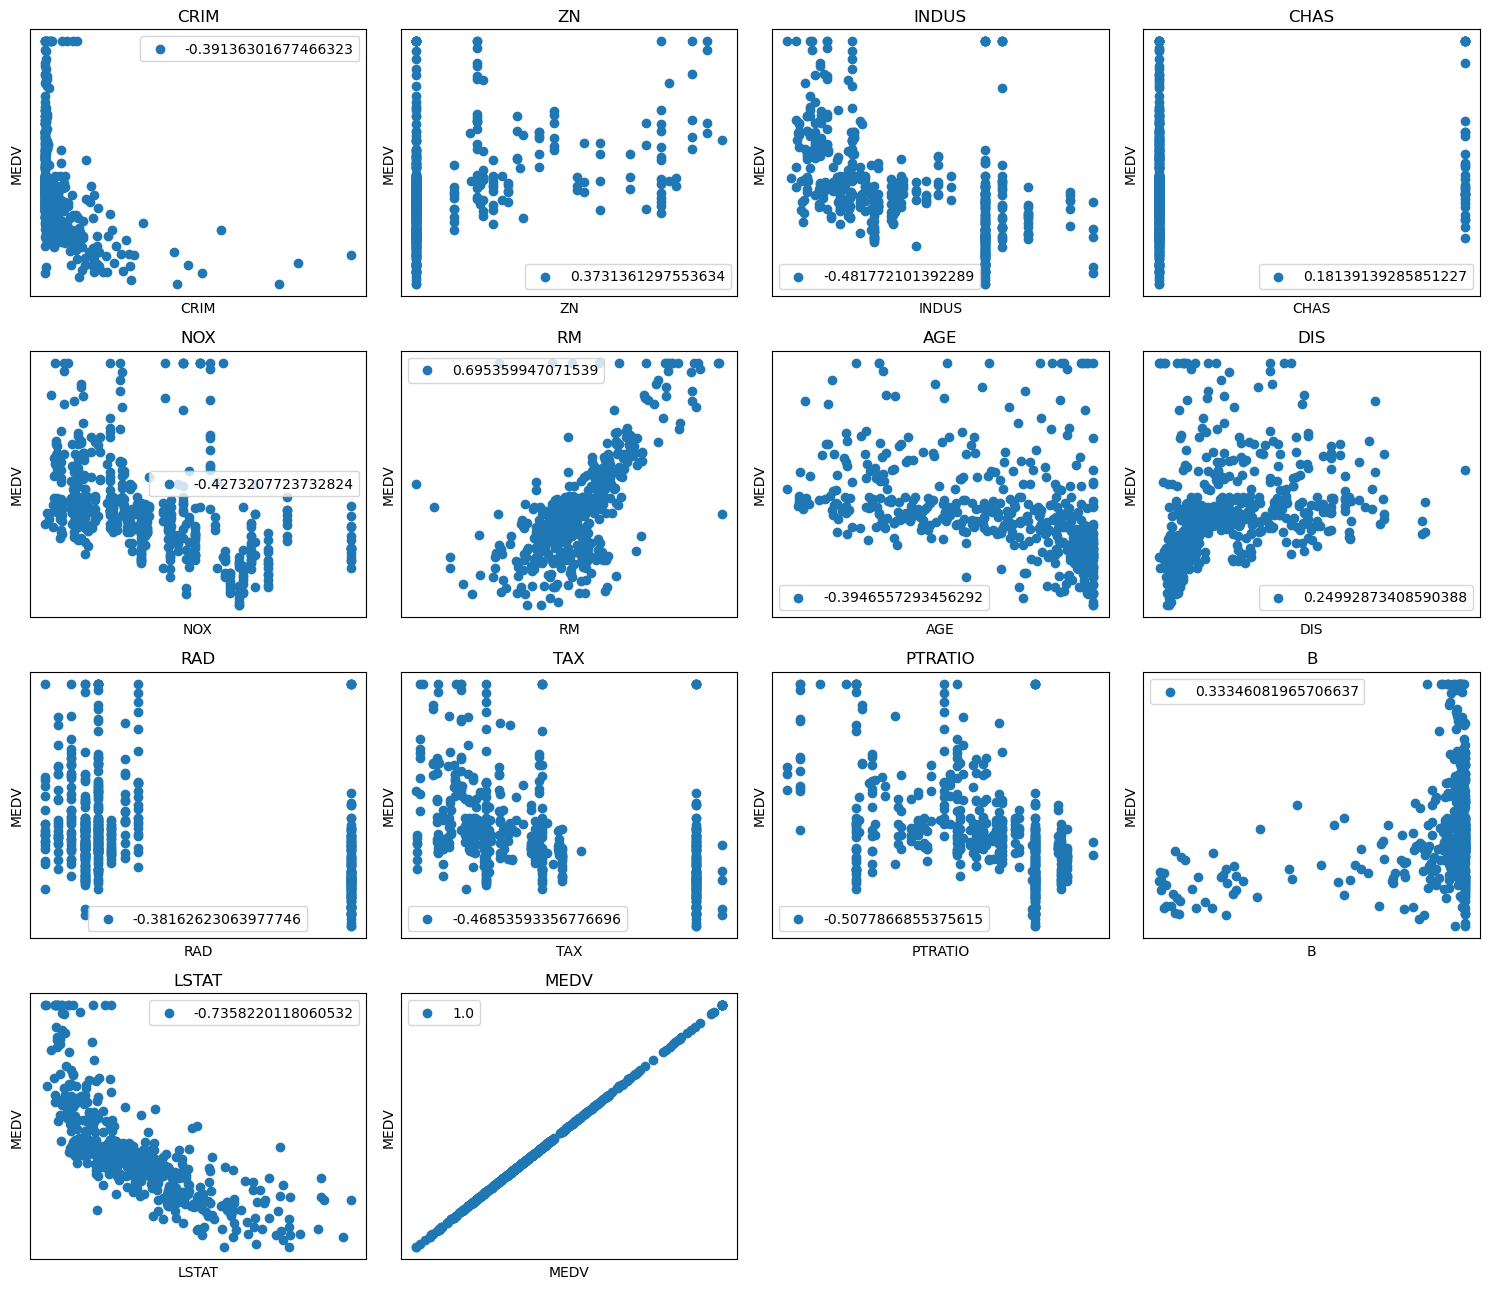

In [8]:
# plot
plt.figure(figsize=(15, 13))
corr_list = []
for idx, col in enumerate(houseDF.columns):
    corr = houseDF[col].corr(houseDF['MEDV'])
    corr_list.append((col, abs(corr)))
    plt.subplot(4, 4, idx + 1)
    plt.scatter(houseDF[col], houseDF['MEDV'], label=corr)
    plt.xticks([])
    plt.xlabel(col)
    plt.yticks([])
    plt.ylabel('MEDV')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# RM, LSTAT : 높은 상관 관계
corr_list.sort(key=lambda x: x[1], reverse=True)
corr_list   # RM, LSTAT, PTRATIO, NOX

[('MEDV', 1.0),
 ('LSTAT', 0.7358220118060532),
 ('RM', 0.695359947071539),
 ('PTRATIO', 0.5077866855375615),
 ('INDUS', 0.481772101392289),
 ('TAX', 0.46853593356776696),
 ('NOX', 0.4273207723732824),
 ('AGE', 0.3946557293456292),
 ('CRIM', 0.39136301677466323),
 ('RAD', 0.38162623063977746),
 ('ZN', 0.3731361297553634),
 ('B', 0.33346081965706637),
 ('DIS', 0.24992873408590388),
 ('CHAS', 0.18139139285851227)]

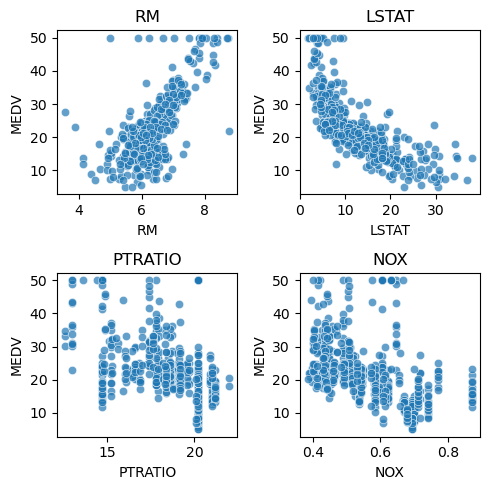

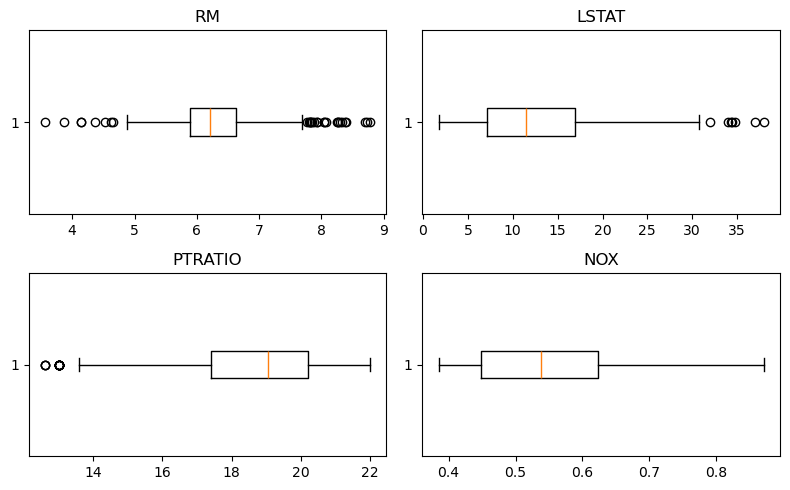

In [10]:
# 이상치 처리 고민
# plot 4 features
import seaborn as sns

cols = ['RM', 'LSTAT', 'PTRATIO', 'NOX']
plt.figure(figsize=(5, 5))
for idx, col in enumerate(cols):
    plt.subplot(2, 2, idx + 1)
    sns.scatterplot(x=col, y='MEDV', data=houseDF, alpha=0.7)
    plt.title(col)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
for idx, col in enumerate(cols):
    plt.subplot(2, 2, idx + 1)
    plt.boxplot(houseDF[col].dropna(), vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()  # => 필요시 이상치를 IQR 기준으로 제거하자

In [11]:
# NaN 고민
houseDF[cols].isnull().sum()    # LSTAT만 해당

# 위 두 그래프로 판단했을 때 분포가 고르므로, 중앙값으로 대체
houseDF['LSTAT'] = houseDF['LSTAT'].fillna(houseDF['LSTAT'].median())
houseDF[cols].isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
NOX        0
dtype: int64

In [12]:
# feature, target split
X = houseDF[['RM', 'LSTAT', 'PTRATIO', 'NOX']]
y = houseDF['MEDV']

# train, val, test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=11)


In [13]:
# Set Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Performance
print('train score :', lr.score(X_train, y_train))
print('val score :', lr.score(X_val, y_val))
# test 값은 예측에 사용

# Predict
lr_pred = lr.predict(X_test)
print('predict score :', lr.score(X_test, y_test))

train score : 0.6770411168291668
val score : 0.6588632922623314
predict score : 0.658226172682423


In [14]:
# SGD : 데이터양이 적으므로 패스

In [15]:
# 학습 모델 성능 평가
# from sklearn.metrics import confusion_matrix, classification_report

# # cm = confusion_matrix(y_test, lr_pred)

# cr = classification_report(y_test, lr_pred)
# cr

# classification이 아니므로 못 씀,,,

# MAE, RMSE 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE :', mean_absolute_error(y_test, lr_pred))
print('RMSE :', mean_squared_error(y_test, lr_pred, squared=False))
print('R2 score :', r2_score(y_test, lr_pred))  # score와 동일

MAE : 3.6010675738957905
RMSE : 5.415109925460093
R2 score : 0.658226172682423


<hr>

성능 끌어올리기

In [16]:
# 1. Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(max_iter=30000)
ridge.fit(X_train, y_train)
print('train score :', ridge.score(X_train, y_train))
print('val score :', ridge.score(X_val, y_val))

train score : 0.6767410001084978
val score : 0.6615147283764529


In [17]:
# Set parameters : alpha, params
from sklearn.model_selection import GridSearchCV
import numpy as np

params = {'alpha' : np.arange(0.0001, 0.01, 0.0005).tolist(),
          'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
          'fit_intercept' : [True, False]}

for c in range(3, 8, 2):
    ridge_GS = GridSearchCV(ridge, params, cv=c)
    ridge_GS.fit(X_train, y_train)
    print('cv :', c, 'best score :', ridge_GS.best_score_)
    print('best params :', ridge_GS.best_params_)
    print('best estimator :', ridge_GS.best_estimator_)


cv : 3 best score : 0.6431679342546649
best params : {'alpha': 0.0001, 'fit_intercept': True, 'solver': 'sparse_cg'}
best estimator : Ridge(alpha=0.0001, max_iter=30000, solver='sparse_cg')
cv : 5 best score : 0.6356379175457059
best params : {'alpha': 0.0096, 'fit_intercept': True, 'solver': 'saga'}
best estimator : Ridge(alpha=0.0096, max_iter=30000, solver='saga')
cv : 7 best score : 0.6381811868317875
best params : {'alpha': 0.0096, 'fit_intercept': True, 'solver': 'saga'}
best estimator : Ridge(alpha=0.0096, max_iter=30000, solver='saga')


In [18]:
# 점수가 미미하다... poly 진행

In [19]:
# PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)
X_poly_test = poly.transform(X_test)

# set model again
ridge_poly = Ridge(max_iter=30000)
ridge_poly.fit(X_poly, y_train)
print('train score :', ridge_poly.score(X_poly, y_train))
print('val score :', ridge_poly.score(X_poly_val, y_val))

train score : 0.8427421543264407
val score : 0.7672800099411115


In [20]:
for c in range(2, 9):
    ridge_GS = GridSearchCV(ridge_poly, params, cv=c)
    ridge_GS.fit(X_poly, y_train)
    print('cv :', c, 'best score :', ridge_GS.best_score_)
    print('best params :', ridge_GS.best_params_)
    print('best estimator :', ridge_GS.best_estimator_)

cv : 2 best score : 0.8029178347938803
best params : {'alpha': 0.0001, 'fit_intercept': True, 'solver': 'auto'}
best estimator : Ridge(alpha=0.0001, max_iter=30000)
cv : 3 best score : 0.80333610191947
best params : {'alpha': 0.0001, 'fit_intercept': True, 'solver': 'auto'}
best estimator : Ridge(alpha=0.0001, max_iter=30000)
cv : 4 best score : 0.808204036320366
best params : {'alpha': 0.0001, 'fit_intercept': True, 'solver': 'svd'}
best estimator : Ridge(alpha=0.0001, max_iter=30000, solver='svd')
cv : 5 best score : 0.804900136641252
best params : {'alpha': 0.0001, 'fit_intercept': True, 'solver': 'svd'}
best estimator : Ridge(alpha=0.0001, max_iter=30000, solver='svd')
cv : 6 best score : 0.8030769034639675
best params : {'alpha': 0.0001, 'fit_intercept': True, 'solver': 'auto'}
best estimator : Ridge(alpha=0.0001, max_iter=30000)


In [ ]:
# cv=4 is best; print train, test score

ridge_GS = GridSearchCV(ridge_poly, params, cv=4)
ridge_GS.fit(X_poly, y_train)
print('train score :', ridge_GS.score(X_poly, y_train))
print('val score :', ridge_GS.score(X_poly_val, y_val))
print('test score :', ridge_GS.score(X_poly_test, y_test))

# 과대 적합 : 진행할 수록 성능 감소; alpha 조정되는 데 왜지?

train score : 0.8575697723965285
val score : 0.7558559769176982
test score : 0.7012200751206449


In [ ]:
# 2. Lasso : 시간 관계상 생략 - 지금 해봐야겠다
from sklearn.linear_model import Lasso

lasso_poly = Lasso(max_iter=30000)
lasso_poly.fit(X_poly, y_train)
print('train score :', lasso_poly.score(X_poly, y_train))
print('val score :', lasso_poly.score(X_poly_val, y_val))
print('test score :', lasso_poly.score(X_poly_test, y_test))

NameError: name 'X_poly' is not defined

1. 요약
1) 상관계수 확인 후 네 컬럼을 피처로 결정, 결측치는 중앙값으로 대체
2) 선형 회귀 모델을 사용하여 성능 평가 : 0.658
3) Ridge : GridSearchCV 사용, alpha 조정 -> cv=4, 0.643
4) PolynomialFeatures 사용, degree=2 -> cv=4
5) alpha=0.0001에서 test score 0.701 (train=0.857, 과대적합)

2. 결론
1) 70.1% 정확도로 ['RM', 'LSTAT', 'PTRATIO', 'NOX'] 중 RM 외엔 MDEV와 음의 상관 관계를 가짐
2) 음 - LSTAT : 소득이 100% 미만인 지역 비율, PTRATIO : 학생 수와 교사 수의 비율, NOX : 일산화탄소 농도
3) 양 - RM : 거주지 평균 방 수